In [16]:
import os
import torchaudio
import torch
from pydub import AudioSegment
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [18]:
audio = AudioSegment.from_wav('./speech_res/diaid0_uid21_iid246_20-30_women_269.mp3')

In [19]:
audio

In [86]:
waveform, sample_rate = torchaudio.load('./speech_res/diaid1627_uid46_iid167_over 30_women_318.mp3')

In [83]:
resampler=torchaudio.transforms.Resample(sample_rate,sample_rate)

In [84]:
waveform = resampler(waveform)

In [85]:
waveform.shape

torch.Size([1, 357376])

In [80]:
waveform=torch.mean(waveform,dim=0,keepdim=True)

In [87]:
sample_rate

22050

In [73]:
def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None):
    waveform = waveform.numpy()
    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate
    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f'Channel {c+1}')
        if xlim:
            axes[c].set_xlim(xlim)
        if ylim:
            axes[c].set_ylim(ylim)
    figure.suptitle(title)
    plt.show(block=False)

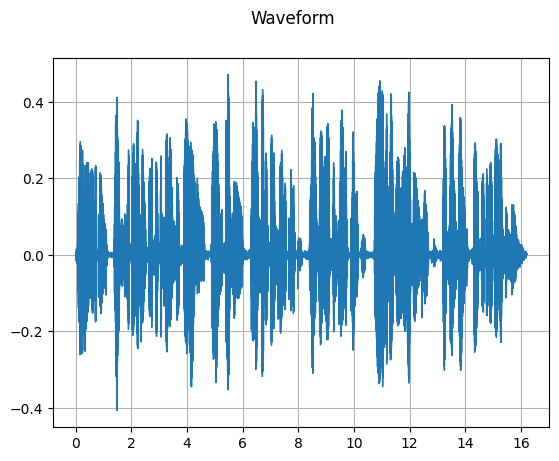

In [74]:
plot_waveform(waveform, sample_rate)

In [26]:
wavform_num = waveform.numpy()

In [27]:
wavform_num.shape

(1, 292608)

In [28]:
with open('test.npy', 'wb') as f:
    np.save(f, wavform_num)

In [31]:
file_paths = ['./speech_res/diaid0_uid21_iid246_20-30_women_269.mp3', './speech_res/diaid1627_uid46_iid167_over 30_women_318.mp3', './speech_res/diaid5072_uid53_iid193_over 30_women_318.mp3']

In [34]:
audio_data_list = []
for file_path in file_paths:
    audio_data, sample_rate = torchaudio.load(file_path)
    audio_data_list.append(audio_data)

In [37]:
bundle = torchaudio.pipelines.WAV2VEC2_BASE

In [39]:
model = bundle.get_model()

Downloading: "https://download.pytorch.org/torchaudio/models/wav2vec2_fairseq_base_ls960.pth" to /Users/lhy/.cache/torch/hub/checkpoints/wav2vec2_fairseq_base_ls960.pth


  0%|          | 0.00/360M [00:00<?, ?B/s]

In [40]:
wav2vec = model

In [75]:
features, _ = model.extract_features(waveform)

In [56]:
len(features)

12

In [76]:
features[0][0].shape

torch.Size([1116, 768])

In [41]:
print(wav2vec)

Wav2Vec2Model(
  (feature_extractor): FeatureExtractor(
    (conv_layers): ModuleList(
      (0): ConvLayerBlock(
        (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
      )
      (1): ConvLayerBlock(
        (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
      )
      (2): ConvLayerBlock(
        (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
      )
      (3): ConvLayerBlock(
        (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
      )
      (4): ConvLayerBlock(
        (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
      )
      (5): ConvLayerBlock(
        (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
      )
      (6): ConvLayerBlock(
        (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
      )
    )
  )
  (encoder): Encoder(
    (feature_projection): FeatureProjec

In [67]:
with torch.inference_mode():
    features, _ = model.extract_features(waveform)

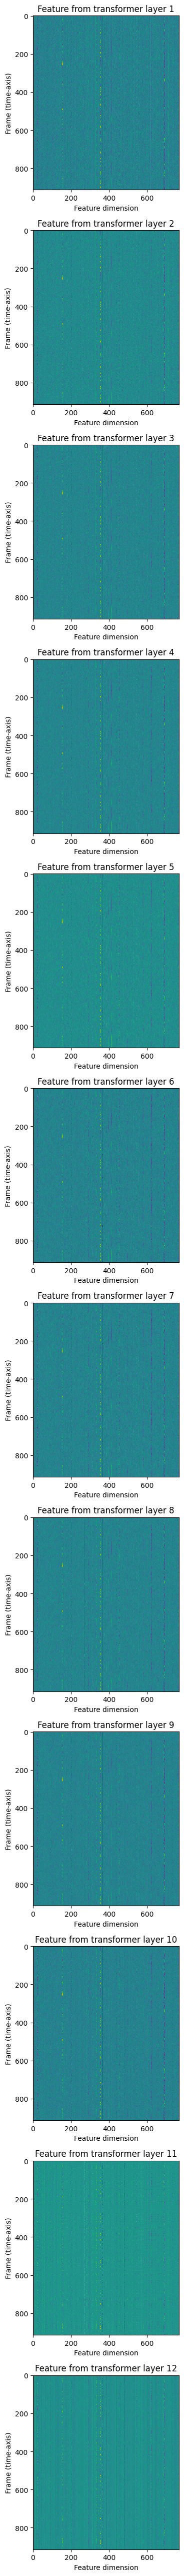

In [68]:
fig, ax = plt.subplots(len(features), 1, figsize=(16, 4.3 * len(features)))
for i, feats in enumerate(features):
    ax[i].imshow(feats[0].cpu(), interpolation="nearest")
    ax[i].set_title(f"Feature from transformer layer {i+1}")
    ax[i].set_xlabel("Feature dimension")
    ax[i].set_ylabel("Frame (time-axis)")
plt.tight_layout()
plt.show()
    